In [1]:
import os
from wordcloud import WordCloud, STOPWORDS
from collections import defaultdict
import tweepy
import pandas as pd
import re
import nltk
from nltk.probability import FreqDist
import numpy as np

from thefuzz import fuzz
from textblob import TextBlob
from sklearn import metrics
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import time
import csv
import lxml

from bs4 import BeautifulSoup
from nltk import word_tokenize
from nltk.tokenize import WordPunctTokenizer
token = WordPunctTokenizer()

Opening text files of articles on 6 different potential presidential candidates

In [2]:
ftext = open('Biden2.txt') # Joe Biden
ftext2 = open('GavinNewsom.txt') # Gavin Newsom
ftext3 = open('GretchenWhitmer.txt') # Gretchen Whitmer
ftext4 = open('MikePence.txt') # Mike Pence
ftext5 = open('NikkiHaley.txt') # Nikki Haley
ftext6 = open('Ron.txt') # Ron DeSantis

Creating a word cloud for 6 different potential presidential candidates:

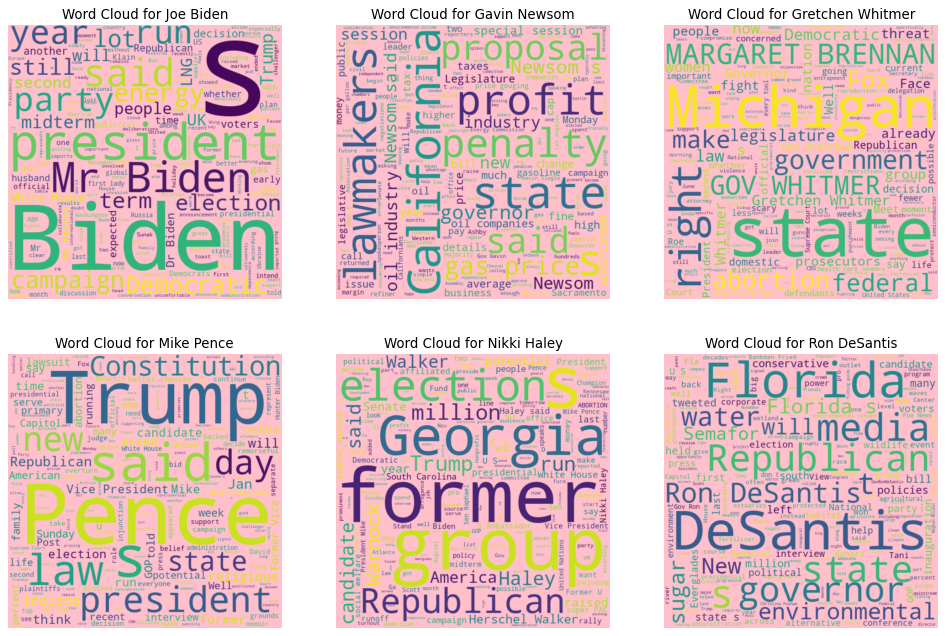

In [3]:
# Creating a word cloud for Joe Biden:

textB = ""
for word in ftext.read().split():
    textB = textB + " " + word
wordcloud = WordCloud(width=600, height=600, background_color="pink").generate(textB)
plt.figure(figsize=(15, 10), dpi=80)
plt.subplot(2,3,1)
plt.title("Word Cloud for Joe Biden")
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)

# Creating a word cloud for Gavin Newsom:

textN = ""
for word in ftext2.read().split():
    textN = textN + " " + word

wordcloud = WordCloud(width=600, height=600, background_color="pink").generate(textN)

plt.subplot(2,3,2)
plt.title("Word Cloud for Gavin Newsom")
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)

# Creating a word cloud for Gretchen Whitmer:

textW = ""
for word in ftext3.read().split():
    textW = textW + " " + word

wordcloud = WordCloud(width=600, height=600, background_color="pink").generate(textW)

plt.subplot(2,3,3)
plt.title("Word Cloud for Gretchen Whitmer")
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)

# Creating a word cloud for Mike Pence:

textM = ""
for word in ftext4.read().split():
    textM = textM + " " + word

wordcloud = WordCloud(width=600, height=600, background_color="pink").generate(textM)

plt.subplot(2,3,4)
plt.title("Word Cloud for Mike Pence")
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)

# Creating a word cloud for Nikki Haley:

textH = ""
for word in ftext5.read().split():
    textH = textH + " " + word

wordcloud = WordCloud(width=600, height=600, background_color="pink").generate(textH)

plt.subplot(2,3,5)
plt.title("Word Cloud for Nikki Haley")
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)

# Creating a word cloud for Ron DeSantis:

textR = ""
for word in ftext6.read().split():
    textR = textR + " " + word

wordcloud = WordCloud(width=600, height=600, background_color="pink").generate(textR)

plt.subplot(2,3,6)
plt.title("Word Cloud for Ron DeSantis")
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)

# Ploting the 6 word clouds

plt.show()

The second step.

In [4]:
consumer_key = "Hwa8WkRtpBldnLa93zBBaI8Dv"                               # Using Twitter API 
consumer_secret = "KUTq8oUMwoBD5PFxHJjTnITP3CL24e7SM6tW5S5vlw6ljXUMCt"
access_token = "45246641-E3GCskJIStuPRr7oyoTiPhft23NVlCdrd2PbwuKz3"
access_token_secret = "ZIQSDvFTofZSyNzQzUJvy9PxsJSjfFZIGyCjrhqB47Djf"
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, wait_on_rate_limit=True)

In [5]:
def keyword_to_csv(tag,keyword,recent):                                  # a method to search something on twitter and put 
    try:                                                                 # the search resault into a csv file.
        query = tag+keyword
        tweets = tweepy.Cursor(api.search_tweets,q=query).items(recent)
        tweets_list = [[tweet.text] for tweet in tweets]
        df = pd.DataFrame(tweets_list,columns=['Text'])
        df.to_csv('{}.csv'.format(tag), sep=',', index = False)
    except BaseException as e:
        print('failed on_status,',str(e))
        time.sleep(3)    

In [6]:
tags = ["Biden", "Whitmer", "Newsom"]                              # official world cup tweets
tags2 = ["DeSantis", "Pence", "Haley"]
keyword = ' -is:retweets lang:en'          # tweets with specific tags but not retweets, english only
numbtwt = 100                             # recent 100 tweets
keyword_to_csv(tags[0],keyword, numbtwt)
keyword_to_csv(tags[1],keyword, numbtwt)
keyword_to_csv(tags[2],keyword, numbtwt)
keyword_to_csv(tags2[0],keyword, numbtwt)
keyword_to_csv(tags2[1],keyword, numbtwt)
keyword_to_csv(tags2[2],keyword, numbtwt)



In [7]:
df = pd.read_csv(tags[0]+".csv")             # loads csv file into pandas dataframe
pd.options.display.max_colwidth = 200 
df1 = pd.read_csv(tags[1]+".csv")
df2 = pd.read_csv(tags[2]+".csv")
df3 = pd.read_csv(tags2[0]+".csv")
df4 = pd.read_csv(tags2[1]+".csv")
df5 = pd.read_csv(tags2[2]+".csv")
df.head()

,Text
0,RT @Sandy66: WOW - so many hating on Griner and saying Biden left a marine behind. He was an ex-marine who had a bad conduct discharge. He…
1,@upperleftrighty @jimmy0726 @robertleomoore @GovInslee @POTUS @brittneygriner Captain obvious! And the only people… https://t.co/IaZhKrWe3M
2,"RT @NoLieWithBTC: This is US Marine Trevor Reed, who Biden got released from Russia. His release was delayed by Republicans like Marjorie T…"
3,RT @JudicialWatch: The United States Secret Service has repeatedly changed its position about whether it is in possession of records relate…
4,"RT @FoxNews: Hunter Biden seen at ritzy NYC art gallery selling his paintings for up to $200k, despite ethics concerns https://t.co/TbIXzHU…"


In [8]:
re_list = ['(https?://)?(www\.)?(\w+\.)?(\w+)(\.\w+)(/.+)?', '@[A-Za-z0-9_]+','#'] # a list of everything except english 
combined_re = re.compile( '|'.join( re_list) )                                     # words to clean the data with them

In [9]:
regex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags = re.UNICODE)

In [10]:
def cleaning_tweets(t):                                             # a method to return a cleaned string 
    del_amp = BeautifulSoup(t, 'lxml')
    del_amp_text = del_amp.get_text()
    del_link_mentions = re.sub(combined_re, '', del_amp_text)
    del_emoticons = re.sub(regex_pattern, '', del_link_mentions)
    lower_case = del_emoticons.lower()
    words = token.tokenize(lower_case)
    result_words = [x for x in words if len(x) > 2]
    return (" ".join(result_words)).strip()

In [11]:
# print("Cleaning the tweets...\n")
cleaned_tweets = []
for i in range(0,numbtwt):      # clean tweets one by one
    if( (i+1)%10 == 0 ):        # print something after cleaning 10 tweets
        print("Tweets {} of {} have ben processed".format(i+1,numbtwt))     
    cleaned_tweets.append(cleaning_tweets((df.Text[i])))
df['cleaned tweet'] = cleaned_tweets # add the 'cleaned tweet' column into the data frame
df.head()

Tweets 10 of 100 have ben processed
Tweets 20 of 100 have ben processed
Tweets 30 of 100 have ben processed
Tweets 40 of 100 have ben processed
Tweets 50 of 100 have ben processed
Tweets 60 of 100 have ben processed
Tweets 70 of 100 have ben processed
Tweets 80 of 100 have ben processed
Tweets 90 of 100 have ben processed
Tweets 100 of 100 have ben processed


C:\Users\rashd\anaconda3\lib\site-packages\bs4\__init__.py:435: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(


,Text,cleaned tweet
0,RT @Sandy66: WOW - so many hating on Griner and saying Biden left a marine behind. He was an ex-marine who had a bad conduct discharge. He…,wow many hating griner and saying biden left marine behind was marine who had bad conduct discharge
1,@upperleftrighty @jimmy0726 @robertleomoore @GovInslee @POTUS @brittneygriner Captain obvious! And the only people… https://t.co/IaZhKrWe3M,captain obvious and the only people
2,"RT @NoLieWithBTC: This is US Marine Trevor Reed, who Biden got released from Russia. His release was delayed by Republicans like Marjorie T…",this marine trevor reed who biden got released from russia his release was delayed republicans like marjorie
3,RT @JudicialWatch: The United States Secret Service has repeatedly changed its position about whether it is in possession of records relate…,the united states secret service has repeatedly changed its position about whether possession records relate
4,"RT @FoxNews: Hunter Biden seen at ritzy NYC art gallery selling his paintings for up to $200k, despite ethics concerns https://t.co/TbIXzHU…",hunter biden seen ritzy nyc art gallery selling his paintings for 200k despite ethics concerns


In [12]:
cleaned_tweets1 = []
for i in range(0,numbtwt):      # clean tweets one by one
    if( (i+1)%10 == 0 ):        # print something after cleaning 10 tweets
        print("Tweets {} of {} have ben processed".format(i+1,numbtwt))     
    cleaned_tweets1.append(cleaning_tweets((df1.Text[i])))
df1['cleaned tweet'] = cleaned_tweets1 # add the 'cleaned tweet' column into the data frame

Tweets 10 of 100 have ben processed
Tweets 20 of 100 have ben processed
Tweets 30 of 100 have ben processed
Tweets 40 of 100 have ben processed
Tweets 50 of 100 have ben processed
Tweets 60 of 100 have ben processed
Tweets 70 of 100 have ben processed
Tweets 80 of 100 have ben processed
Tweets 90 of 100 have ben processed
Tweets 100 of 100 have ben processed


C:\Users\rashd\anaconda3\lib\site-packages\bs4\__init__.py:435: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(


In [13]:
cleaned_tweets2 = []
for i in range(0,numbtwt):      # clean tweets one by one
    if( (i+1)%10 == 0 ):        # print something after cleaning 10 tweets
        print("Tweets {} of {} have ben processed".format(i+1,numbtwt))     
    cleaned_tweets2.append(cleaning_tweets((df2.Text[i])))
df2['cleaned tweet'] = cleaned_tweets2 # add the 'cleaned tweet' column into the data frame

Tweets 10 of 100 have ben processed
Tweets 20 of 100 have ben processed
Tweets 30 of 100 have ben processed
Tweets 40 of 100 have ben processed
Tweets 50 of 100 have ben processed
Tweets 60 of 100 have ben processed
Tweets 70 of 100 have ben processed
Tweets 80 of 100 have ben processed
Tweets 90 of 100 have ben processed
Tweets 100 of 100 have ben processed


C:\Users\rashd\anaconda3\lib\site-packages\bs4\__init__.py:435: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(


In [14]:
cleaned_tweets3 = []
for i in range(0,numbtwt):      # clean tweets one by one
    if( (i+1)%10 == 0 ):        # print something after cleaning 10 tweets
        print("Tweets {} of {} have ben processed".format(i+1,numbtwt))     
    cleaned_tweets3.append(cleaning_tweets((df3.Text[i])))
df3['cleaned tweet'] = cleaned_tweets3 # add the 'cleaned tweet' column into the data frame

C:\Users\rashd\anaconda3\lib\site-packages\bs4\__init__.py:435: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(


Tweets 10 of 100 have ben processed
Tweets 20 of 100 have ben processed
Tweets 30 of 100 have ben processed
Tweets 40 of 100 have ben processed
Tweets 50 of 100 have ben processed
Tweets 60 of 100 have ben processed
Tweets 70 of 100 have ben processed
Tweets 80 of 100 have ben processed
Tweets 90 of 100 have ben processed
Tweets 100 of 100 have ben processed


In [15]:
cleaned_tweets4 = []
for i in range(0,numbtwt):      # clean tweets one by one
    if( (i+1)%10 == 0 ):        # print something after cleaning 10 tweets
        print("Tweets {} of {} have ben processed".format(i+1,numbtwt))     
    cleaned_tweets4.append(cleaning_tweets((df4.Text[i])))
df4['cleaned tweet'] = cleaned_tweets4 # add the 'cleaned tweet' column into the data frame

C:\Users\rashd\anaconda3\lib\site-packages\bs4\__init__.py:435: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(


Tweets 10 of 100 have ben processed
Tweets 20 of 100 have ben processed
Tweets 30 of 100 have ben processed
Tweets 40 of 100 have ben processed
Tweets 50 of 100 have ben processed
Tweets 60 of 100 have ben processed
Tweets 70 of 100 have ben processed
Tweets 80 of 100 have ben processed
Tweets 90 of 100 have ben processed
Tweets 100 of 100 have ben processed


In [16]:
cleaned_tweets5 = []
for i in range(0,numbtwt):      # clean tweets one by one
    if( (i+1)%10 == 0 ):        # print something after cleaning 10 tweets
        print("Tweets {} of {} have ben processed".format(i+1,numbtwt))     
    cleaned_tweets5.append(cleaning_tweets((df5.Text[i])))
df5['cleaned tweet'] = cleaned_tweets5 # add the 'cleaned tweet' column into the data frame

Tweets 10 of 100 have ben processed
Tweets 20 of 100 have ben processed
Tweets 30 of 100 have ben processed


C:\Users\rashd\anaconda3\lib\site-packages\bs4\__init__.py:435: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(


Tweets 40 of 100 have ben processed
Tweets 50 of 100 have ben processed
Tweets 60 of 100 have ben processed
Tweets 70 of 100 have ben processed
Tweets 80 of 100 have ben processed
Tweets 90 of 100 have ben processed
Tweets 100 of 100 have ben processed


In [17]:
string = [pd.Series(cleaned_tweets).str.cat(sep=' '),
          pd.Series(cleaned_tweets1).str.cat(sep=' '),
          pd.Series(cleaned_tweets2).str.cat(sep=' '),
          pd.Series(cleaned_tweets3).str.cat(sep=' '),
          pd.Series(cleaned_tweets4).str.cat(sep=' '),
          pd.Series(cleaned_tweets5).str.cat(sep=' ')] # A list of cleaned tweets for each president to generate word clouds
                                                       # on them

In [18]:
stopwords = set(STOPWORDS)
stopwords.update(["Joe","said"])

In [19]:
tags = tags + tags2
tags

['Biden', 'Whitmer', 'Newsom', 'DeSantis', 'Pence', 'Haley']

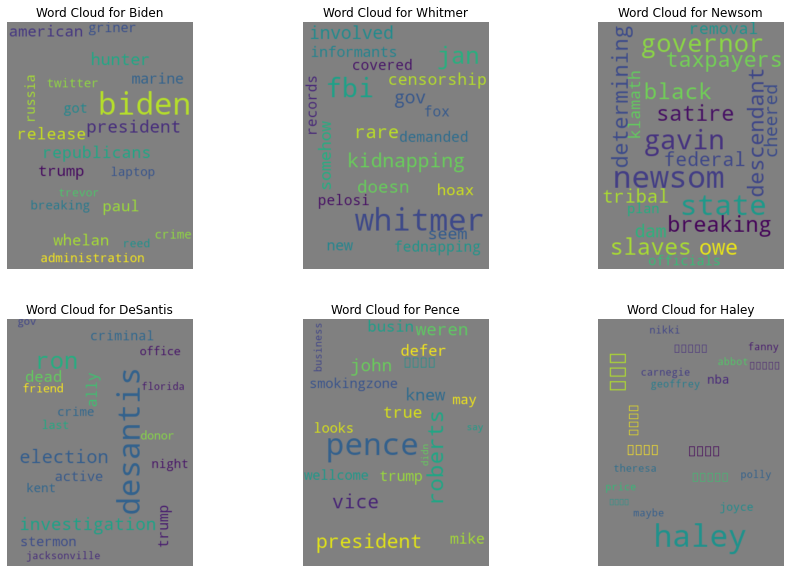

In [20]:

plt.figure(figsize=(15,10))
for i in range(len(string)):             # A loop to generate word clouds for each candidate
    wordcloud = WordCloud(width=300, stopwords=stopwords,height=400,max_font_size=50,max_words=20,collocations=False, background_color='grey').generate(string[i])
    plt.subplot(2,3,i+1)
    plt.title("Word Cloud for " + tags[i])
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
plt.show()

In [35]:
mydf = [df, df1, df2, df3, df4, df5]       # List of data frames
myList = ["", "", "", "", "", ""]          # List of strings of people's tweet
count = 0
for i in range(len(mydf)):
    for j in mydf[i]['cleaned tweet']:
        myList[i] += j 


In [39]:
print("Similarity ratio for Biden: ", fuzz.token_sort_ratio(myList[0], textB)) # print the similarity ratio for each candidate
print("Similarity ratio for Whitmer: ", fuzz.token_sort_ratio(myList[1], textW))
print("Similarity ratio for Newsom: ", fuzz.token_sort_ratio(myList[2], textN))
print("Similarity ratio for DeSantis: ", fuzz.token_sort_ratio(myList[3], textR))
print("Similarity ratio for Pence: ", fuzz.token_sort_ratio(myList[4], textM))
print("Similarity ratio for Haley: ", fuzz.token_sort_ratio(myList[5], textH))

Similarity ratio for Biden:  53
Similarity ratio for Whitmer:  45
Similarity ratio for Newsom:  51
Similarity ratio for DeSantis:  44
Similarity ratio for Pence:  46
Similarity ratio for Haley:  37


In [44]:
for i in mydf:                                                 # add sentiments ratio for each candidate
    i['polarity'] = i['cleaned tweet'].apply(lambda x: TextBlob(x).sentiment[0])
    i['subjectivity'] = i['cleaned tweet'].apply(lambda x: TextBlob(x).sentiment[1])
df1.head()

,Text,cleaned tweet,polarity,subjectivity
0,"@ImMeme0 @KimDotcom ""Gretchen Whitmer kidnapping""\n\nA lot of people really don't know what happened here, it gets lo… https://t.co/3lFf9J5CTM",gretchen whitmer kidnapping lot people really don know what happened here gets,0.2,0.2
1,"RT @leehawk25: @elonmusk @ggreenwald It doesn’t seem so rare when the FBI is somehow involved in Jan. 6, Gov Whitmer kidnapping, censorship…",doesn seem rare when the fbi somehow involved jan gov whitmer kidnapping censorship,0.3,0.9
2,"RT @toledosports: Senior Deric Jaynes led Whitmer with 25 points, and sophomore Antione West had 21 points. ""Coach preached 'Panther basket…",senior deric jaynes led whitmer with points and sophomore antione west had points coach preached panther basket,0.0,0.0
3,"RT @leehawk25: @elonmusk @ggreenwald It doesn’t seem so rare when the FBI is somehow involved in Jan. 6, Gov Whitmer kidnapping, censorship…",doesn seem rare when the fbi somehow involved jan gov whitmer kidnapping censorship,0.3,0.9
4,RT @AP: Federal prosecutors told a judge Monday that a life prison sentence is justified for the leader of a plot to kidnap Michigan Gov. G…,federal prosecutors told judge monday that life prison sentence justified for the leader plot kidnap michigan gov,0.4,0.9


In [23]:

for i in range(len(mydf)):                                          # print the mean, max, min and median for each candidate
    display('For ' + tags[i], mydf[i][['polarity', 'subjectivity']].agg([np.mean, np.max, np.min, np.median]))

'For Biden'

,polarity,subjectivity
mean,0.027511,0.251798
amax,0.550000,1.000000
amin,-1.000000,0.000000
median,0.000000,0.100000


'For Whitmer'

,polarity,subjectivity
mean,0.109364,0.374802
amax,0.500000,1.000000
amin,-0.400000,0.000000
median,0.000000,0.150000


'For Newsom'

,polarity,subjectivity
mean,-0.009394,0.335152
amax,0.800000,1.000000
amin,-0.800000,0.000000
median,0.000000,0.400000


'For DeSantis'

,polarity,subjectivity
mean,0.015428,0.302152
amax,0.800000,1.000000
amin,-1.000000,0.000000
median,0.000000,0.254167


'For Pence'

,polarity,subjectivity
mean,0.093003,0.245913
amax,0.525000,1.000000
amin,-0.155556,0.000000
median,0.000000,0.000000


'For Haley'

,polarity,subjectivity
mean,0.067807,0.136216
amax,0.750000,0.950000
amin,-0.516667,0.000000
median,0.000000,0.000000


A few failed attempts to do naive bayes classification

In [24]:
os.getcwd()

'C:\\Users\\rashd\\Documents\\DSCI320ipynb\\finalproject'

In [25]:
# LABELS = ['Positive', 'Negative']
# BASE_DIR = 'C:\\Users\\rashd\\Documents\\DSCI320ipynb\\finalproject'
# # text = ""
# # for word in ftext.read().split():
# #     text = text + " " + word
# # print(text)
# def create_data_set():
#     docs = []
#     with open('data.txt', 'w', encoding='utf8') as outfile:
#         for label in LABELS:
#             dir = '%s/%s' % (BASE_DIR, label)
#             for filename in os.listdir(dir):
#                 fullfilename = '%s/%s' % (dir, filename) 
#                 print(fullfilename)
#                 with open(fullfilename, 'rb') as file:
#                     text = file.read().decode(errors='replace').replace('\n', '') 
#                     doc = (label, text)
#                     docs.append(doc)
#                     outfile.write('%s\t%s\t%s\n' % (label, filename, text))
#     return docs
# a = create_data_set()

In [26]:
# import string
# import random

# def clean_text(text):
#     #remove punctuation
#     text = text.translate(str.maketrans('', '', string.punctuation))
#     # convert to lower case
#     text =  text.lower()
#     return text
# stopwords.add('’')
# stopwords.add('will')

# def get_tokens(text):
# # get individual words
#     tokens = word_tokenize(text)
# # remove common words that are useless
#     tokens = [t for t in tokens if not t in stopwords]
#     return tokens

# def print_frequency_dist(docs):
#     tokens = defaultdict(list)
# # lets make a giant list of all the words for each category 
#     for doc in docs:
#         doc_label = doc[0]

#         doc_text = clean_text(doc[1])

#         doc_tokens = get_tokens(doc_text)
#         tokens[doc_label].extend(doc_tokens)
#     for category_label, category_tokens in tokens.items():
#         print(category_label)
#         fd = FreqDist(category_tokens)
#         print(fd.most_common (20))
        
        
# def evaluate_classifier(title, classifier, vectorizer, X_test, y_test):
#     X_test_tfidf = vectorizer.transform(X_test)
#     y_pred = classifier.predict(X_test_tfidf)
    
# #     print(metrics.classification_report(y_test, y_pred))
    
#     precision = metrics.precision_score(y_test, y_pred)
#     recall = metrics.recall_score(y_test, y_pred)
#     f1 = metrics.f1_score(y_test, y_pred)
#     print("%s\t%f\t%f\t%f\n" % (title, precision, recall, f1))
            
# def train_test_split(docs): 
#     # scramble docs
#     random.shuffle(docs) 
#     X_train = [] #training documents 
#     y_train = [] #corresponding training labels
    
#     X_test = [] #test documents
#     y_test = [] #correspoding test label
#     pivot =  int(.80 * len(docs))

#     for i in range(0, pivot):
#         X_train.append(docs[i][1])
#         y_train.append(docs[i][0])
#     for i in range(pivot, len(docs)):
#         X_test.append(docs[i][1])
#         y_test.append(docs[i][0])
#     return X_train, X_test, y_train, y_test
        
# # def train_classifier(docs):
# #     X_train, X_test, y_train, y_test = train_test_split(docs)
# #     # the object that turns text into vectors
# #     vectorizer = CountVectorizer(analyzer='word')
# #     #create doc-term matrix
# #     dtm = vectorizer.fit_transform(X_train)

# #     # train Naive Bayes classifier
# #     naive_bayes_classifier = MultinomialNB().fit(dtm, y_train)
# #     evaluate_classifier("Naive Bayes\tTRAIN\t", naive_bayes_classifier, vectorizer, X_train, y_train)
# #     evaluate_classifier("Naive Bayes\TEST\t", naive_bayes_classifier, vectorizer, X_test, y_test)

# # print_frequency_dist(a)
# X_train, X_test, y_train, y_test = train_test_split(a)
# X_train

# # train_classifier(a)
    

In [27]:
# cat = ['Positive', 'Negat']